#  Audit de Qualité des Données Fournisseurs – Maison de Luxe
# Supplier Data Quality Audit – Luxury House


This notebook performs a data quality audit on a fictitious supplier repository used in the luxury industry.
Ce notebook réalise un audit de qualité des données sur un référentiel fournisseurs fictif utilisé dans l’industrie du luxe.

In [2]:
import pandas as pd

df = pd.read_csv("supplier_master_data_luxe.csv")
df.head()

,Supplier_ID,Name,Country,VAT_Number,Email,Contract_Type,Creation_Date,Compliance_RGPD,Status
0,SUPP0329,Johnston-Simmons,Japan,IX72476051,ryan29@hotmail.com,Logistics,2021-09-26,No,Active
1,SUPP0466,Gonzalez-Clark,United Kingdom,lR81988776,yward@herrera-nelson.com,Logistics,2016-09-09,Yes,Inactive
2,SUPP0984,"Haley, Nelson and Vargas",Switzerland,NaN,ajackson@hotmail.com,Distribution,2022-12-07,Yes,Inactive
3,SUPP0574,Perkins-Flores,UAE,Ty79940127,howardpaul@smith.com,Logistics,2024-01-10,Yes,Inactive
4,SUPP0412,Johnson-Chen,UAE,Cd18104584,kjones@gmail.com,Consulting,2022-03-16,Yes,Inactive


## 1. Analyse de complétude - Completeness analysis

In [3]:
# Checking critical fields
completude = df[['Supplier_ID', 'Name', 'Country', 'VAT_Number', 'Email']].isnull().mean() * 100
completude

Supplier_ID    0.000000
Name           0.000000
Country        0.000000
VAT_Number     4.757282
Email          0.000000
dtype: float64

## 2. Détection des valeurs invalides - Detection of invalid values

In [7]:
# Invalid emails
df['Email_Valid'] = df['Email'].str.contains(r'^[\w\.-]+@[\w\.-]+\.\w+$')
invalid_emails = df[~df['Email_Valid']]
print(f"Invalid emails : {len(invalid_emails)}")

Invalid emails : 67


In [8]:
# Missing VAT
vat_missing = df[df['VAT_Number'].isnull() | (df['VAT_Number'] == '')]
print(f"Missing VAT : {len(vat_missing)}")

Missing VAT : 49


In [9]:
# Duplicates
duplicates = df.duplicated(subset=['Name', 'Country', 'VAT_Number'])
print(f"Detected duplicates : {duplicates.sum()}")

Detected duplicates : 20


## 3. Score de qualité des données - Data quality score

In [10]:
def compute_quality_score(row):
    score = 100
    if not row['Email_Valid']: score -= 25
    if pd.isna(row['VAT_Number']) or row['VAT_Number'] == '': score -= 25
    if row['Compliance_RGPD'] == 'No': score -= 25
    if row['Country'] not in [c[0] for c in countries]: score -= 25
    return score

# List of valid countries
countries = [
    "France", "Italy", "Switzerland", "Germany", "Spain",
    "United Kingdom", "United States", "China", "Japan", "India", "UAE", "Brazil"
]

df['Data_Quality_Score'] = df.apply(compute_quality_score, axis=1)
df[['Supplier_ID', 'Data_Quality_Score']].head()

,Supplier_ID,Data_Quality_Score
0,SUPP0329,50
1,SUPP0466,75
2,SUPP0984,50
3,SUPP0574,75
4,SUPP0412,75


## 4. Résumé global - Summary

Mean global score : 69.12621359223301


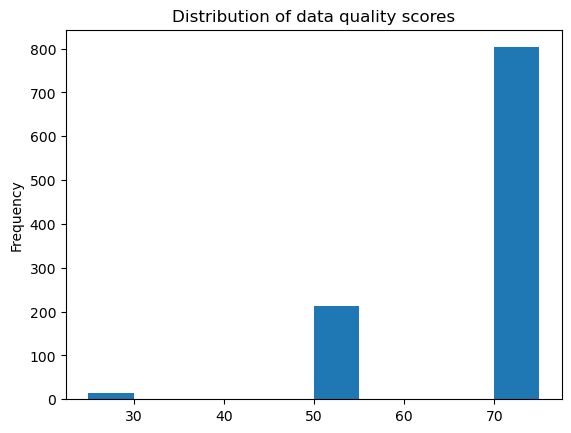

In [12]:
print("Mean global score :", df['Data_Quality_Score'].mean())
df['Data_Quality_Score'].plot.hist(title="Distribution of data quality scores", bins=10);